In [1]:
# import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
import datetime
import time
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
data_covid = pd.read_csv("D:/KLTN/dataset_covid.csv", delimiter=",", encoding="latin-1")
data_covid

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_13948\3984957625.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_covid = pd.read_csv("D:/KLTN/dataset_covid.csv", delimiter=",", encoding="latin-1")


,sex,age_phan_loai,mach_on_dinh,nhietdo_on_dinh,nhiptho_on_dinh,chieucao,cannang,bmi_on_dinh,huyetap1_on_dinh,huyetap2_on_dinh,...,caccoquan_hohap_phoigiamthongkhi,caccoquan_hohap_longnguccandoi,caccoquan_hohap_cokeoco,caccoquan_tuanhoan_binhthuong,caccoquan_tuanhoan_longnguccandoi,caccoquan_tuanhoan_timdeu,caccoquan_tuanhoan_timnhanh,caccoquan_tuanhoan_T1T2ro,caccoquan_tuanhoan_momtimduongtrungdon,tienluong
0,1,1,0,0,0,167,60.0,1,1,1,...,0,0,0,0,0,1,0,0,0,1
1,1,5,1,0,0,165,50.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,5,1,0,0,155,60.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,5,1,0,0,165,70.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,5,0,0,0,155,40.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,UNKNOWN,UNKNOWN,0,0,0,110,20.0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2287,UNKNOWN,UNKNOWN,0,0,0,68,11.0,1,0,0,...,0,0,0,0,0,1,0,0,0,7
2288,UNKNOWN,UNKNOWN,0,0,0,80,10.0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2289,UNKNOWN,UNKNOWN,0,0,0,50,3.8,0,0,0,...,0,0,0,0,0,0,0,0,0,7


TẠO DATAFRAME

- X lấy từ cột đầu và trừ cột cuối cùng == feature
- y lấy cột cuối cùng làm nhãn == label


In [3]:
# Sử dụng iloc để lấy toàn bộ cột và dòng
X = data_covid.iloc[:, :-1]  # Lấy từ cột thứ 1 đến cột trước cột cuối cùng
y = data_covid.iloc[:, -1]  # Lấy cột cuối cùng làm nhãn
df = pd.concat([X, y], axis=1)  # Tạo DataFrame từ X và y

# Điền kiện lọc
# df = data[data['sex']=='0']
display(df)  # Hiển thị DataFrame

,sex,age_phan_loai,mach_on_dinh,nhietdo_on_dinh,nhiptho_on_dinh,chieucao,cannang,bmi_on_dinh,huyetap1_on_dinh,huyetap2_on_dinh,...,caccoquan_hohap_phoigiamthongkhi,caccoquan_hohap_longnguccandoi,caccoquan_hohap_cokeoco,caccoquan_tuanhoan_binhthuong,caccoquan_tuanhoan_longnguccandoi,caccoquan_tuanhoan_timdeu,caccoquan_tuanhoan_timnhanh,caccoquan_tuanhoan_T1T2ro,caccoquan_tuanhoan_momtimduongtrungdon,tienluong
0,1,1,0,0,0,167,60.0,1,1,1,...,0,0,0,0,0,1,0,0,0,1
1,1,5,1,0,0,165,50.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,5,1,0,0,155,60.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,5,1,0,0,165,70.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,5,0,0,0,155,40.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,UNKNOWN,UNKNOWN,0,0,0,110,20.0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2287,UNKNOWN,UNKNOWN,0,0,0,68,11.0,1,0,0,...,0,0,0,0,0,1,0,0,0,7
2288,UNKNOWN,UNKNOWN,0,0,0,80,10.0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2289,UNKNOWN,UNKNOWN,0,0,0,50,3.8,0,0,0,...,0,0,0,0,0,0,0,0,0,7


XỬ LÍ UNKNOWN
- Gán giá trị '-1' cho các ô chứa 'UNKNOWN' trong DataFrame


In [4]:
# Tạo một bản sao của DataFrame df để thực hiện xử lý
df_processed = df.copy()

# Gán giá trị '-1' cho các ô chứa 'UNKNOWN' trong DataFrame
df_processed.replace("UNKNOWN", -1, inplace=True)

# Hiển thị DataFrame sau khi xử lý
display(df_processed)

,sex,age_phan_loai,mach_on_dinh,nhietdo_on_dinh,nhiptho_on_dinh,chieucao,cannang,bmi_on_dinh,huyetap1_on_dinh,huyetap2_on_dinh,...,caccoquan_hohap_phoigiamthongkhi,caccoquan_hohap_longnguccandoi,caccoquan_hohap_cokeoco,caccoquan_tuanhoan_binhthuong,caccoquan_tuanhoan_longnguccandoi,caccoquan_tuanhoan_timdeu,caccoquan_tuanhoan_timnhanh,caccoquan_tuanhoan_T1T2ro,caccoquan_tuanhoan_momtimduongtrungdon,tienluong
0,1,1,0,0,0,167,60.0,1,1,1,...,0,0,0,0,0,1,0,0,0,1
1,1,5,1,0,0,165,50.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,5,1,0,0,155,60.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,5,1,0,0,165,70.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,5,0,0,0,155,40.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,-1,-1,0,0,0,110,20.0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2287,-1,-1,0,0,0,68,11.0,1,0,0,...,0,0,0,0,0,1,0,0,0,7
2288,-1,-1,0,0,0,80,10.0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
2289,-1,-1,0,0,0,50,3.8,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [5]:
# Tách 10 đặc trưng của nhân khẩu học
# X_df_processed = df_processed.iloc[:, 10:-1]
# y_df_processed = df_processed.iloc[:, -1]

# Chuyển đổi cột 'age' thành kiểu số nguyên
# df_processed['age'] = df_processed['age'].astype(int)
# Lọc tách theo độ tuổi từ 15 đến 59
# filtered_age_df = df_processed.drop(df_processed[(df_processed['age'] >= 15) & (df_processed['age'] <= 59)].index)
# Lọc tách theo độ tuổi trên 60
# filtered_age_df = df_processed.drop(df_processed[(df_processed['age'] >= 60)].index)
# X_df_processed = filtered_age_df.iloc[:, :-1]
# y_df_processed = filtered_age_df.iloc[:, -1]

# Tách giới tính thành 2 nhóm
# 1 - nam và 0 - nữ
# filtered_sex_df = df_processed[df_processed['sex'] == '0']

# Tách các đặc trưng còn lại
# filtered_feature_df_filtered = df_processed.drop(columns=df_processed.filter(like='caccoquan_hohap_').columns)
# X_df_processed = filtered_feature_df_filtered.iloc[:, :-1]
# y_df_processed = filtered_feature_df_filtered.iloc[:, -1]

X_df_processed = df_processed.iloc[:, :-1]
y_df_processed = df_processed.iloc[:, -1]

X_df_processed.info()
y_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Columns: 275 entries, sex to caccoquan_tuanhoan_momtimduongtrungdon
dtypes: float64(1), int64(267), object(7)
memory usage: 4.8+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 2291 entries, 0 to 2290
Series name: tienluong
Non-Null Count  Dtype
--------------  -----
2291 non-null   int64
dtypes: int64(1)
memory usage: 18.0 KB


Scale dữ liệu

In [6]:
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale dữ liệu
X_scaler = scaler.fit_transform(X_df_processed)

# Chuyển đổi dữ liệu thành dạng numpy
X = X_scaler
y = y_df_processed.to_numpy().ravel()


In [7]:
display(y)

array([1, 1, 1, ..., 7, 7, 7], dtype=int64)

GridSearch KNN

In [8]:
# Tham số cần tìm kiếm 
param_grid = {'n_neighbors': range(1, 101), 'metric': ['euclidean','minkowski']}

# Tạo mô hình KNN classifier
knn = KNeighborsClassifier()

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, k in enumerate(results['param_n_neighbors']):
    print(f"k = {k}, Accuracy = {results['mean_test_score'][i]}, metric = {results['param_metric'][i]}")

# In kết quả tốt nhất
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
best_metric = grid_search.best_params_['metric']
print(f"\nBest value of k: {best_k}")
print(f"Best accuracy score: {best_score}")
print(f"Best metric: {best_metric}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_KNN.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('k, Accuracy, metric\n')

    for i, k in enumerate(results['param_n_neighbors']):
        accuracy = results['mean_test_score'][i]
        metric = results['param_metric'][i]

        txtfile.write(f"{k}, {accuracy}, {metric}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of k: {best_k}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")
    txtfile.write(f"Best metric: {best_metric}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


k = 1, Accuracy = 0.9113916840706284, metric = euclidean
k = 2, Accuracy = 0.8786424909815835, metric = euclidean
k = 3, Accuracy = 0.8685988228593127, metric = euclidean
k = 4, Accuracy = 0.8498443136510347, metric = euclidean
k = 5, Accuracy = 0.8459122840326561, metric = euclidean
k = 6, Accuracy = 0.8236491361306246, metric = euclidean
k = 7, Accuracy = 0.811427757736852, metric = euclidean
k = 8, Accuracy = 0.803130814505411, metric = euclidean
k = 9, Accuracy = 0.8005164230112018, metric = euclidean
k = 10, Accuracy = 0.790041769508259, metric = euclidean
k = 11, Accuracy = 0.7817467248908297, metric = euclidean
k = 12, Accuracy = 0.7738883614961078, metric = euclidean
k = 13, Accuracy = 0.7712720713878869, metric = euclidean
k = 14, Accuracy = 0.7634175052211886, metric = euclidean
k = 15, Accuracy = 0.7594949686728689, metric = euclidean
k = 16, Accuracy = 0.7468388076704006, metric = euclidean
k = 17, Accuracy = 0.7433491551167647, metric = euclidean
k = 18, Accuracy = 0.73069

GridSearch SVM --> Xác định kiểu dữ liệu

In [9]:
# Tham số cần tìm kiếm 
param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel':['linear', 'rbf']}

# Tạo mô hình SVM
svm = SVC()

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, C in enumerate(results['param_C']):
    print(f"C = {C}, Accuracy = {results['mean_test_score'][i]}, kernel = {results['param_kernel'][i]}")

# In kết quả tốt nhất
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_
best_kernel = grid_search.best_params_['kernel']
print(f"\nBest value of C: {best_C}")
print(f"Best accuracy score: {best_score}")
print(f"Best kernel: {best_kernel}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_SVM_data.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('C, Accuracy, kernel\n')

    for i, C in enumerate(results['param_C']):
        accuracy = results['mean_test_score'][i]
        kernel = results['param_kernel'][i]

        txtfile.write(f"{C}, {accuracy}, {kernel}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of C: {best_C}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")
    txtfile.write(f"Best kernel: {best_kernel}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


C = 0.01, Accuracy = 0.6831042339092461, kernel = linear
C = 0.01, Accuracy = 0.5050218340611353, kernel = rbf
C = 0.1, Accuracy = 0.7891684070628441, kernel = linear
C = 0.1, Accuracy = 0.6534288969052592, kernel = rbf
C = 1, Accuracy = 0.8419973419403834, kernel = linear
C = 1, Accuracy = 0.8764685779381052, kernel = rbf
C = 10, Accuracy = 0.869054490222138, kernel = linear
C = 10, Accuracy = 0.9310328460224035, kernel = rbf

Best value of C: 10
Best accuracy score: 0.9310328460224035
Best kernel: rbf
Kết quả đã được lưu vào file D:/KLTN/GridSearch_Results/grid_search_SVM_data.txt.


GridSearch SVM

In [10]:
# Tham số cần tìm kiếm 
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma':['scale', 'auto']}

# Tạo mô hình SVM
svm = SVC(kernel='rbf')

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, C in enumerate(results['param_C']):
    print(f"C = {C}, Accuracy = {results['mean_test_score'][i]}, gamma = {results['param_gamma'][i]}")

# In kết quả tốt nhất
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_
best_gamma = grid_search.best_params_['gamma']
print(f"\nBest value of C: {best_C}")
print(f"Best accuracy score: {best_score}")
print(f"Best gamma: {best_gamma}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_SVM.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('C, Accuracy, gamma\n')

    for i, C in enumerate(results['param_C']):
        accuracy = results['mean_test_score'][i]
        gamma = results['param_gamma'][i]

        txtfile.write(f"{C}, {accuracy}, {gamma}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of C: {best_C}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")
    txtfile.write(f"Best gamma: {best_gamma}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


C = 0.01, Accuracy = 0.5050218340611353, gamma = scale
C = 0.01, Accuracy = 0.5050218340611353, gamma = auto
C = 0.1, Accuracy = 0.6534288969052592, gamma = scale
C = 0.1, Accuracy = 0.5050218340611353, gamma = auto
C = 1, Accuracy = 0.8764685779381052, gamma = scale
C = 1, Accuracy = 0.6486235048414658, gamma = auto
C = 10, Accuracy = 0.9310328460224035, gamma = scale
C = 10, Accuracy = 0.785673058667173, gamma = auto
C = 100, Accuracy = 0.9323352952344788, gamma = scale
C = 100, Accuracy = 0.8694911714448452, gamma = auto
C = 1000, Accuracy = 0.9323352952344788, gamma = scale
C = 1000, Accuracy = 0.9113916840706284, gamma = auto
C = 10000, Accuracy = 0.931461932789064, gamma = scale
C = 10000, Accuracy = 0.9140155686348965, gamma = auto
C = 100000, Accuracy = 0.9305885703436492, gamma = scale
C = 100000, Accuracy = 0.9148851338522878, gamma = auto

Best value of C: 100
Best accuracy score: 0.9323352952344788
Best gamma: scale
Kết quả đã được lưu vào file D:/KLTN/GridSearch_Results/gr

Chia mịn C trong SVM

In [11]:
# Tham số cần tìm kiếm 
param_grid = {'C': range(1,best_C+1), 'gamma':['scale', 'auto']}

# Tạo mô hình SVM
svm = SVC(kernel='rbf')

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, C in enumerate(results['param_C']):
    print(f"C = {C}, Accuracy = {results['mean_test_score'][i]}, gamma = {results['param_gamma'][i]}")

# In kết quả tốt nhất
best_C_clean = grid_search.best_params_['C']
best_score = grid_search.best_score_
best_gamma_clean = grid_search.best_params_['gamma']
print(f"\nBest value of C: {best_C_clean}")
print(f"Best accuracy score: {best_score}")
print(f"Best gamma: {best_gamma_clean}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_SVM_clean.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('C, Accuracy, gamma\n')

    for i, C in enumerate(results['param_C']):
        accuracy = results['mean_test_score'][i]
        gamma = results['param_gamma'][i]

        txtfile.write(f"{C}, {accuracy}, {gamma}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of C: {best_C_clean}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")
    txtfile.write(f"Best gamma: {best_gamma_clean}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


C = 1, Accuracy = 0.8764685779381052, gamma = scale
C = 1, Accuracy = 0.6486235048414658, gamma = auto
C = 2, Accuracy = 0.9017846971710652, gamma = scale
C = 2, Accuracy = 0.7036187583064364, gamma = auto
C = 3, Accuracy = 0.9161913802923867, gamma = scale
C = 3, Accuracy = 0.7306835010442378, gamma = auto
C = 4, Accuracy = 0.9218663375735714, gamma = scale
C = 4, Accuracy = 0.742906778052022, gamma = auto
C = 5, Accuracy = 0.9266641351813176, gamma = scale
C = 5, Accuracy = 0.7516328080501234, gamma = auto
C = 6, Accuracy = 0.9288513385228783, gamma = scale
C = 6, Accuracy = 0.7616669831023353, gamma = auto
C = 7, Accuracy = 0.9271046136320485, gamma = scale
C = 7, Accuracy = 0.7690886652743497, gamma = auto
C = 8, Accuracy = 0.9297247009682931, gamma = scale
C = 8, Accuracy = 0.7756350863869376, gamma = auto
C = 9, Accuracy = 0.9301613821910004, gamma = scale
C = 9, Accuracy = 0.7817429276628062, gamma = auto
C = 10, Accuracy = 0.9310328460224035, gamma = scale
C = 10, Accuracy = 0.

GridSearch DCT

In [12]:
# Tham số cần tìm kiếm 
param_grid = {'max_depth': [None] + list(range(1, 101)), 'criterion':['gini', 'entropy']}

# Tạo mô hình DT classifier
dt = DecisionTreeClassifier(random_state=42)

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, max_depth in enumerate(results['param_max_depth']):
    print(f"max_depth = {max_depth}, Accuracy = {results['mean_test_score'][i]}, criterion = {results['param_criterion'][i]}")

# In kết quả tốt nhất
best_max_depth_dct = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_
best_criterion = grid_search.best_params_['criterion']
print(f"\nBest value of max_depth: {best_max_depth_dct}")
print(f"Best accuracy score: {best_score}")
print(f"Best criterion: {best_criterion}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_DCT.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('max_depth, Accuracy, criterion\n')

    for i, max_depth in enumerate(results['param_max_depth']):
        accuracy = results['mean_test_score'][i]
        criterion = results['param_criterion'][i]

        txtfile.write(f"{max_depth}, {accuracy}, {criterion}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of max_depth: {best_max_depth_dct}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")
    txtfile.write(f"Best criterion: {best_criterion}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


max_depth = None, Accuracy = 0.9100835390165181, criterion = gini
max_depth = 1, Accuracy = 0.5050218340611353, criterion = gini
max_depth = 2, Accuracy = 0.5661097398898804, criterion = gini
max_depth = 3, Accuracy = 0.6115321815074996, criterion = gini
max_depth = 4, Accuracy = 0.6865730017087526, criterion = gini
max_depth = 5, Accuracy = 0.7284773115625593, criterion = gini
max_depth = 6, Accuracy = 0.7498651984051642, criterion = gini
max_depth = 7, Accuracy = 0.7821739130434782, criterion = gini
max_depth = 8, Accuracy = 0.802284032656161, criterion = gini
max_depth = 9, Accuracy = 0.8306550218340611, criterion = gini
max_depth = 10, Accuracy = 0.8406778052022025, criterion = gini
max_depth = 11, Accuracy = 0.8629314600341751, criterion = gini
max_depth = 12, Accuracy = 0.8786500854376307, criterion = gini
max_depth = 13, Accuracy = 0.8838997531801784, criterion = gini
max_depth = 14, Accuracy = 0.887383709891779, criterion = gini
max_depth = 15, Accuracy = 0.896992595405354, cri

GridSearch DCT_BG

In [13]:
# Tham số cần tìm kiếm 
param_grid = {'n_estimators': range(100, 1000, 100)}

# Tạo mô hình DCT_BG
dt = DecisionTreeClassifier(max_depth=best_max_depth_dct, criterion=best_criterion, random_state=42)
bg = BaggingClassifier(dt, bootstrap=True, random_state=42, n_jobs=8)
# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(bg, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, n_estimators in enumerate(results['param_n_estimators']):
    print(f"n_estimators = {n_estimators}, Accuracy = {results['mean_test_score'][i]}")

# In kết quả tốt nhất
best_n_estimators_bg = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_
print(f"\nBest value of n_estimators: {best_n_estimators_bg}")
print(f"Best accuracy score: {best_score}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_DCT_BG.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('n_estimators, Accuracy\n')

    for i, n_estimators in enumerate(results['param_n_estimators']):
        accuracy = results['mean_test_score'][i]

        txtfile.write(f"{n_estimators}, {accuracy}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of n_estimators: {best_n_estimators_bg}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


n_estimators = 100, Accuracy = 0.9288494399088665
n_estimators = 200, Accuracy = 0.9271027150180368
n_estimators = 300, Accuracy = 0.9297209037402696
n_estimators = 400, Accuracy = 0.928412758686159
n_estimators = 500, Accuracy = 0.9275393962407442
n_estimators = 600, Accuracy = 0.9266660337953294
n_estimators = 700, Accuracy = 0.9275393962407442
n_estimators = 800, Accuracy = 0.9266660337953294
n_estimators = 900, Accuracy = 0.9266660337953294

Best value of n_estimators: 300
Best accuracy score: 0.9297209037402696
Kết quả đã được lưu vào file D:/KLTN/GridSearch_Results/grid_search_DCT_BG.txt.


GridSearch DCT_ADA

In [14]:
# Tham số cần tìm kiếm 
param_grid = {
    'n_estimators': range(100, 1000, 100), 
    'learning_rate': [0.01,0.05,0.1,0.5,1]
}

# Tạo mô hình DCT_Ada
dt = DecisionTreeClassifier(max_depth=best_max_depth_dct, criterion=best_criterion, random_state=42)
ada = AdaBoostClassifier(dt, algorithm="SAMME.R", random_state=42)
# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(ada, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, n_estimators in enumerate(results['param_n_estimators']):
    print(f"n_estimators = {n_estimators}, Accuracy = {results['mean_test_score'][i]}, learning_rate = {results['param_learning_rate'][i]}")

# In kết quả tốt nhất
best_n_estimators_ada = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_
best_learning_rate_ada = grid_search.best_params_['learning_rate']

print(f"\nBest value of n_estimators: {best_n_estimators_ada}")
print(f"Best value of learning_rate: {best_learning_rate_ada}")
print(f"Best accuracy score: {best_score}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_DCT_ADA.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('n_estimators, Accuracy, learning_rate\n')

    for i, n_estimators in enumerate(results['param_n_estimators']):
        accuracy = results['mean_test_score'][i]
        learning_rate = results['param_learning_rate'][i]

        txtfile.write(f"{n_estimators}, {accuracy}, {learning_rate}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of n_estimators: {best_n_estimators_ada}\n")
    txtfile.write(f"Best value of learning_rate: {best_learning_rate_ada}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


n_estimators = 100, Accuracy = 0.9096449591797988, learning_rate = 0.01
n_estimators = 200, Accuracy = 0.9148889310803116, learning_rate = 0.01
n_estimators = 300, Accuracy = 0.9148889310803116, learning_rate = 0.01
n_estimators = 400, Accuracy = 0.9135807860262009, learning_rate = 0.01
n_estimators = 500, Accuracy = 0.9131441048034933, learning_rate = 0.01
n_estimators = 600, Accuracy = 0.912707423580786, learning_rate = 0.01
n_estimators = 700, Accuracy = 0.9127074235807859, learning_rate = 0.01
n_estimators = 800, Accuracy = 0.9122707423580787, learning_rate = 0.01
n_estimators = 900, Accuracy = 0.911834061135371, learning_rate = 0.01
n_estimators = 100, Accuracy = 0.915323713689007, learning_rate = 0.05
n_estimators = 200, Accuracy = 0.9122707423580787, learning_rate = 0.05
n_estimators = 300, Accuracy = 0.9113973799126637, learning_rate = 0.05
n_estimators = 400, Accuracy = 0.9122707423580785, learning_rate = 0.05
n_estimators = 500, Accuracy = 0.9131441048034935, learning_rate = 

GridSearch MLP

In [15]:
# Tham số cần tìm kiếm
param_grid = {
    'max_iter': [500,1000,3000,5000,10000],
    'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 100), (200, 200)]
}

# Tạo mô hình MLP
mlp = MLPClassifier(random_state=42)

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Tìm kiếm lưới
grid_search = GridSearchCV(mlp, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ kết quả
results = grid_search.cv_results_

# In kết quả
for i, max_iter in enumerate(results['param_max_iter']):
    hidden_layer_sizes = results['param_hidden_layer_sizes'][i]
    accuracy = results['mean_test_score'][i]
    print(f"max_iter = {max_iter}, hidden_layer_sizes = {hidden_layer_sizes}, Accuracy = {accuracy}")

# In kết quả tốt nhất
best_max_iter = grid_search.best_params_['max_iter']
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
best_score = grid_search.best_score_
print(f"\nBest value of max_iter: {best_max_iter}")
print(f"Best value of hidden_layer_sizes: {best_hidden_layer_sizes}")
print(f"Best accuracy score: {best_score}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_MLP.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('max_iter, hidden_layer_sizes, accuracy\n')

    for i, max_iter in enumerate(results['param_max_iter']):
        hidden_layer_sizes = results['param_hidden_layer_sizes'][i]
        accuracy = results['mean_test_score'][i]

        txtfile.write(f"{max_iter}, {hidden_layer_sizes}, {accuracy}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of max_iter: {best_max_iter}\n")
    txtfile.write(f"Best value of hidden_layer_sizes: {best_hidden_layer_sizes}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


max_iter = 500, hidden_layer_sizes = (50,), Accuracy = 0.9183747864059237
max_iter = 1000, hidden_layer_sizes = (50,), Accuracy = 0.9183747864059237
max_iter = 3000, hidden_layer_sizes = (50,), Accuracy = 0.9183747864059237
max_iter = 5000, hidden_layer_sizes = (50,), Accuracy = 0.9183747864059237
max_iter = 10000, hidden_layer_sizes = (50,), Accuracy = 0.9183747864059237
max_iter = 500, hidden_layer_sizes = (100,), Accuracy = 0.9253616859692425
max_iter = 1000, hidden_layer_sizes = (100,), Accuracy = 0.9253616859692425
max_iter = 3000, hidden_layer_sizes = (100,), Accuracy = 0.9253616859692425
max_iter = 5000, hidden_layer_sizes = (100,), Accuracy = 0.9253616859692425
max_iter = 10000, hidden_layer_sizes = (100,), Accuracy = 0.9253616859692425
max_iter = 500, hidden_layer_sizes = (200,), Accuracy = 0.9249269033605468
max_iter = 1000, hidden_layer_sizes = (200,), Accuracy = 0.9249269033605468
max_iter = 3000, hidden_layer_sizes = (200,), Accuracy = 0.9249269033605468
max_iter = 5000, h

GridSearch RF

In [16]:
# Tham số cần tìm kiếm
param_grid = {
    'max_depth': [None] + list(range(1, 101)),
    'n_estimators': range(100, 1000, 100)
}

# Tạo mô hình RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Tìm kiếm lưới
grid_search = GridSearchCV(rf, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ kết quả
results = grid_search.cv_results_

# In kết quả
for i, max_depth in enumerate(results['param_max_depth']):
    n_estimators = results['param_n_estimators'][i]
    accuracy = results['mean_test_score'][i]
    print(f"max_depth = {max_depth}, n_estimators = {n_estimators}, Accuracy = {accuracy}")

# In kết quả tốt nhất
best_max_depth_rf = grid_search.best_params_['max_depth']
best_n_estimators_rf = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_
print(f"\nBest value of max_depth: {best_max_depth_rf}")
print(f"Best value of n_estimators: {best_n_estimators_rf}")
print(f"Best accuracy score: {best_score}")

# Lưu kết quả vào file CSV với ngày giờ chạy
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_file = f"D:/KLTN/GridSearch_Results/grid_search_RF.txt"

with open(output_file, 'w') as txtfile:
    txtfile.write('max_depth, n_estimators, accuracy\n')

    for i, max_depth in enumerate(results['param_max_depth']):
        n_estimators = results['param_n_estimators'][i]
        accuracy = results['mean_test_score'][i]

        txtfile.write(f"{max_depth}, {n_estimators}, {accuracy}\n")

    txtfile.write('\n')
    txtfile.write(f"Best value of max_depth: {best_max_depth_rf}\n")
    txtfile.write(f"Best value of n_estimators: {best_n_estimators_rf}\n")
    txtfile.write(f"Best accuracy score: {best_score}\n")

print(f"Kết quả đã được lưu vào file {output_file}.")

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


max_depth = None, n_estimators = 100, Accuracy = 0.9301537877349535
max_depth = None, n_estimators = 200, Accuracy = 0.931892918169736
max_depth = None, n_estimators = 300, Accuracy = 0.9327700778431744
max_depth = None, n_estimators = 400, Accuracy = 0.932333396620467
max_depth = None, n_estimators = 500, Accuracy = 0.9332067590658818
max_depth = None, n_estimators = 600, Accuracy = 0.9340801215112966
max_depth = None, n_estimators = 700, Accuracy = 0.9340801215112966
max_depth = None, n_estimators = 800, Accuracy = 0.9336434402885893
max_depth = None, n_estimators = 900, Accuracy = 0.9332067590658818
max_depth = 1, n_estimators = 100, Accuracy = 0.5050218340611353
max_depth = 1, n_estimators = 200, Accuracy = 0.5050218340611353
max_depth = 1, n_estimators = 300, Accuracy = 0.5050218340611353
max_depth = 1, n_estimators = 400, Accuracy = 0.5050218340611353
max_depth = 1, n_estimators = 500, Accuracy = 0.5050218340611353
max_depth = 1, n_estimators = 600, Accuracy = 0.5050218340611353


In [17]:
print('KNN --> k = ', best_k, ', metric = ', best_metric)
print('SVM --> C = ', best_C_clean, ', gamma = ', best_gamma_clean)
print('MLP --> hidden_layer_sizes = ', best_hidden_layer_sizes, ', max_iter = ', best_max_iter)
print('DCT --> max_depth = ', best_max_depth_dct, ', criterion = ',best_criterion)
print('DCT_BG --> n_estimators = ', best_n_estimators_bg)
print('DCT_ADA --> n_estimators = ', best_n_estimators_ada, ', learning_rate = ', best_learning_rate_ada)
print('RF --> n_estimators = ', best_n_estimators_rf,', max_depth = ',best_max_depth_rf)

KNN --> k =  1 , metric =  euclidean
SVM --> C =  59 , gamma =  scale
MLP --> hidden_layer_sizes =  (200, 200) , max_iter =  500
DCT --> max_depth =  23 , criterion =  gini
DCT_BG --> n_estimators =  300
DCT_ADA --> n_estimators =  100 , learning_rate =  0.05
RF --> n_estimators =  300 , max_depth =  22


Tổng quan các mô hình

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


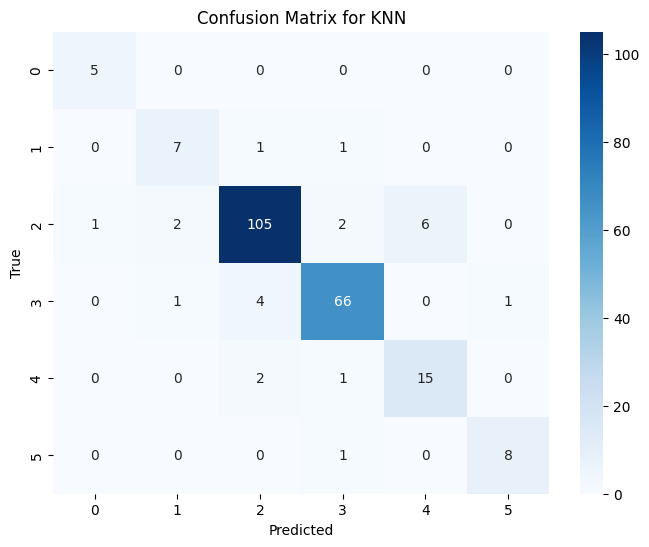

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


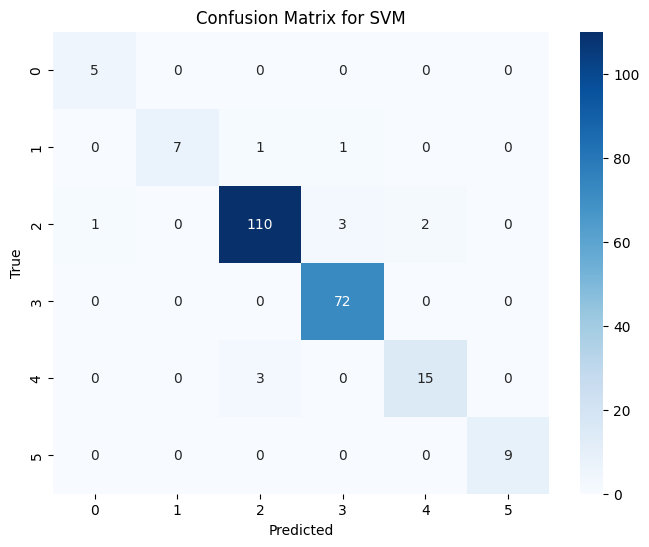

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


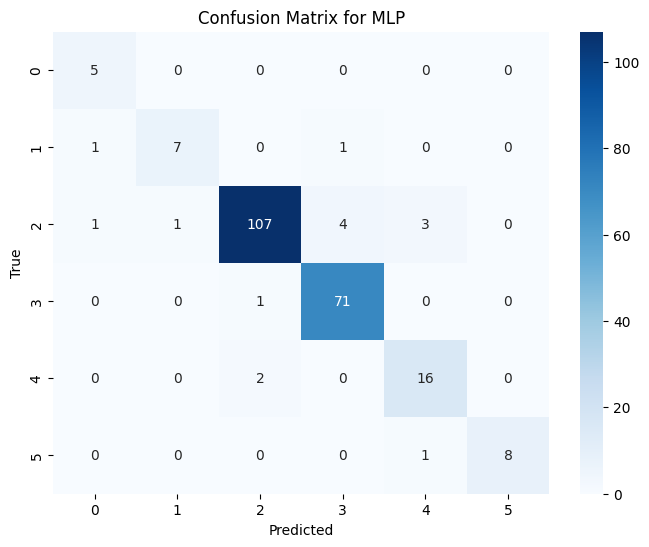

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


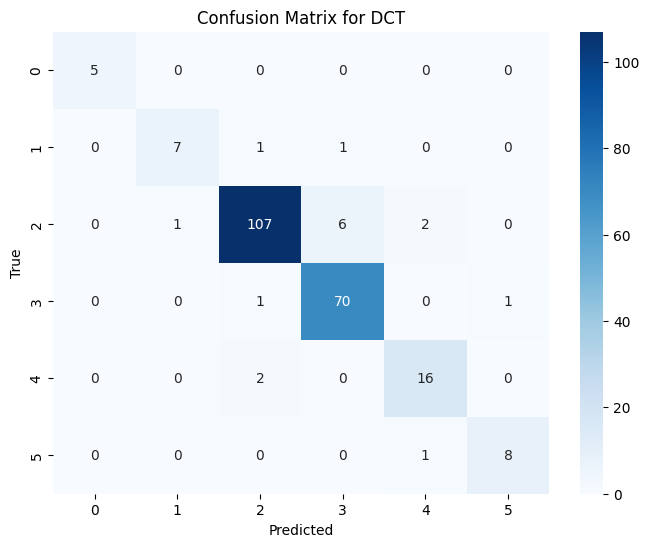

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


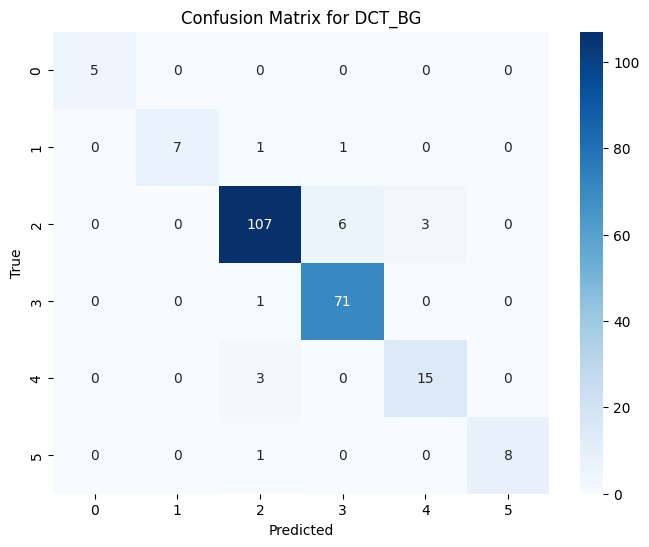

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


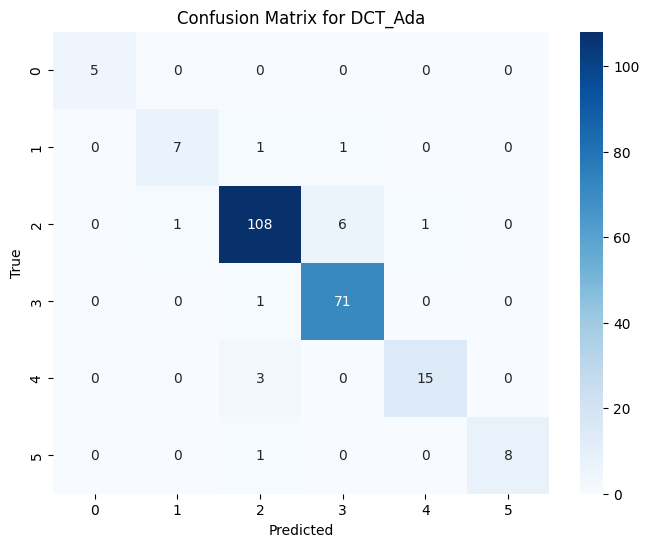

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


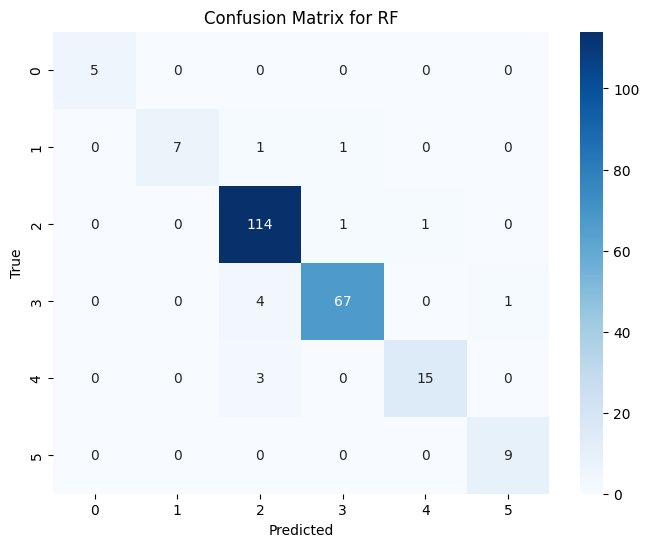

     Model  Accuracy  Precision    Recall  F1 Score  Training Time (s)
0      KNN  91.13917   91.26012  91.13917  91.06978            0.53100
1      SVM  93.27739   93.34507  93.27739  93.17294           19.85717
2      MLP  92.88532   93.03413  92.88532  92.77892           73.45453
3      DCT  91.13898   91.28722  91.13898  91.05078            0.44484
4   DCT_BG  92.97209   93.10742  92.97209  92.85549           98.10440
5  DCT_Ada  91.53237   91.56893  91.53237  91.42530           43.27896
6       RF  93.53921   93.67228  93.53921  93.40555           15.47564


In [18]:
# Khởi tạo các mô hình
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
svm = SVC(C=best_C_clean, kernel='rbf', gamma=best_gamma_clean, probability=True,random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=best_max_iter, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=best_max_depth_dct, criterion=best_criterion,random_state=42)
bagging = BaggingClassifier(decision_tree, n_estimators=best_n_estimators_bg, bootstrap=True, random_state=42)
adaboost = AdaBoostClassifier(decision_tree, n_estimators=best_n_estimators_ada, algorithm="SAMME.R", learning_rate=best_learning_rate_ada, random_state=42)
random_forest = RandomForestClassifier(n_estimators=best_n_estimators_rf, max_depth=best_max_depth_rf, random_state=42)

# Các giá trị và mô hình cần đánh giá
models = {
    'KNN': knn,
    'SVM': svm,
    'MLP': mlp,
    'DCT': decision_tree,
    'DCT_BG': bagging,
    'DCT_Ada': adaboost,
    'RF': random_forest    
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lưu kết quả đánh giá
evaluation_values = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Training Time (s)': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    start_time = time.time()
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        # đánh giá mô hình trên tập test
        y_pred = model.predict(X_test)
        
        # tính các chỉ số đánh giá
        accuracy = accuracy_score(y_test, y_pred)*100
        accuracy_scores.append(accuracy)
        
        precision = precision_score(y_test, y_pred, average='weighted')*100 # tính toán trên toàn bộ dữ liệu
        precision_scores.append(precision)
    
        recall = recall_score(y_test, y_pred, average='weighted')*100
        recall_scores.append(recall)
        
        f1 = f1_score(y_test, y_pred, average='weighted')*100
        f1_scores.append(f1)
        
        # Tính ma trận nhầm lẫn
        cm = confusion_matrix(y_test, y_pred)
        
    evaluation_values['Model'].append(model_name)
    
    mean_accuracy = round(np.mean(accuracy_scores),5)
    evaluation_values['Accuracy'].append(mean_accuracy)
    
    mean_precision = round(np.mean(precision_scores),5)
    evaluation_values['Precision'].append(mean_precision)
    
    mean_recall = round(np.mean(recall_scores),5)
    evaluation_values['Recall'].append(mean_recall)
    
    mean_f1_score = round(np.mean(f1_scores),5)
    evaluation_values['F1 Score'].append(mean_f1_score)
    
    end_time = time.time()  # Kết thúc đếm thời gian
    training_time = end_time - start_time
    evaluation_values['Training Time (s)'].append(round(training_time,5))

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'D:/KLTN/Final/confusion_matrix_{model_name}.png')
    plt.show()
    
# In cây
export_graphviz(
    decision_tree,
    out_file='D:/KLTN/Final/decision_tree_dct.dot',
    feature_names=X_df_processed.columns,
    class_names=np.unique(y).astype(str),
    rounded=True,
    filled=True
)

# Lưu thành file png
(graph,) = pydot.graph_from_dot_file('D:/KLTN/Final/decision_tree_dct.dot')
graph.write_png('D:/KLTN/Final/decision_tree_dct.png')

# Tạo DataFrame từ kết quả đánh giá
df_eval = pd.DataFrame(evaluation_values)

# Lưu DataFrame thành file csv
df_eval.to_csv('D:/KLTN/Final/Tong_quan.csv', index=False)
# Lưu DataFrame thành file txt
output_file = "D:/KLTN/Final/Tong_quan.txt"
with open(output_file, 'w') as txtfile:
    txtfile.write(df_eval.to_string(index=False))

# In kết quả
print(df_eval)

Lưu các mô hình

In [19]:
import pickle

# Lưu các mô hình
with open('D:/KLTN/Models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

with open('D:/KLTN/Models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

with open('D:/KLTN/Models/mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp, f)

with open('D:/KLTN/Models/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree, f)

with open('D:/KLTN/Models/bagging_model.pkl', 'wb') as f:
    pickle.dump(bagging, f)

with open('D:/KLTN/Models/adaboost_model.pkl', 'wb') as f:
    pickle.dump(adaboost, f)

with open('D:/KLTN/Models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

Trích chọn đặc trưng bằng mô hình có F1 score cao nhất

In [20]:
# Chọn mô hình có F1 Score cao nhất
best_model_idx = df_eval['F1 Score'].idxmax()
best_model_name = df_eval.loc[best_model_idx, 'Model']

# Lấy mô hình dựa trên tên mô hình
target_model = models[best_model_name]


In [21]:

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_df_processed, y_df_processed, test_size=0.2)

# Lưu tên cột của X vào file CSV
column_names = X_df_processed.columns.tolist()
column_names_df = pd.DataFrame({'Column Names': column_names})
column_names_df.to_csv('D:/KLTN/Final/ten_cot_X.csv', index=False)

# Sử dụng Sequential Feature Selector để chọn các đặc trưng
sfs = SequentialFeatureSelector(target_model,
                                n_features_to_select=100,
                                direction='forward',
                                n_jobs=-1,
                                scoring='accuracy', cv=10)

# Chọn các đặc trưng trên tập huấn luyện
X_train_selected = sfs.fit_transform(X_train, y_train)


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\mode

In [ ]:
# Lưu các đặc trưng quan trọng
selected_features = np.array(column_names)[sfs.get_support()]
selected_features_df = pd.DataFrame({'Selected Features' :selected_features})
selected_features_df.to_csv('D:/KLTN/Final/' + str(target_model) + '_dac_trung_quan_trong_' + str(sfs.n_features_to_select) + '.csv', index=False)

# Đưa ra dự đoán trên tập kiểm tra
y_pred = target_model.predict(X_test)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred, average='weighted')*100
recall = recall_score(y_test, y_pred, average='weighted')*100
f1 = f1_score(y_test, y_pred, average='weighted')*100

# In kết quả đánh giá
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 97.82135076252723
Precision: 97.84827097987394
Recall: 97.82135076252723
F1 Score: 97.77113424244868


d:\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Huấn luyện các mô hình trên đặc trưng đã chọn

In [ ]:
# Đọc file csv chứa các đặc trưng để lấy tên các cột
file_select = pd.read_csv('D:/KLTN/Final/' + str(target_model) + '_dac_trung_quan_trong_100.csv')

# Lấy danh sách tên cột từ file CSV
column_names = file_select['Selected Features'].tolist()
# Lấy tất cả các cột trong df có tên nằm trong file csv
X_df_processed_select_100 = df_processed[column_names]
y_df_processed_select_100 = df_processed.iloc[:, -1]

X_df_processed_select_100.info()
# y_df_processed_select_100.info()


NameError: name 'sfs' is not defined

In [ ]:
display(X_df_processed_select_100,y_df_processed_select_100)

,nhietdo_on_dinh,nhiptho_on_dinh,chieucao,cannang,huyetap1_on_dinh,lydovaovien_khokhe,lydovaovien_thocokeo,lydovaovien_sot,lydovaovien_ho,lydovaovien_nhucdau,...,khambenh_tongtrangsuykiet,khambenh_yeunuanguoi(P),khambenh_yeunuanguoi(T),khambenh_yeu2chan,khambenh_lietnuanguoi(P),caccoquan_hohap_phoiraleno,caccoquan_hohap_phoiraleam,caccoquan_hohap_phoitho,caccoquan_hohap_cokeoco,caccoquan_tuanhoan_binhthuong
0,0,1,157,50.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,150,45.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,1,168,55.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,170,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,150,45.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,0,0,168,60.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2287,0,0,155,45.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2288,0,0,152,50.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2289,0,0,155,45.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0       3
1       3
2       3
3       3
4       3
       ..
2286    6
2287    6
2288    6
2289    6
2290    6
Name: tienluong, Length: 2291, dtype: int64

In [ ]:
X = X_df_processed_select_100
y = y_df_processed_select_100

# Lưu kết quả đánh giá
evaluation_values_select_100= {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Training Time (s)': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    start_time = time.time()
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)*100
        accuracy_scores.append(accuracy)
        
        precision = precision_score(y_test, y_pred, average='weighted')*100 # tính toán trên toàn bộ dữ liệu
        precision_scores.append(precision)
    
        recall = recall_score(y_test, y_pred, average='weighted')*100
        recall_scores.append(recall)
        
        f1 = f1_score(y_test, y_pred, average='weighted')*100
        f1_scores.append(f1)
        
    evaluation_values_select_100['Model'].append(model_name)
    
    mean_accuracy = round(np.mean(accuracy_scores),5)
    evaluation_values_select_100['Accuracy'].append(mean_accuracy)
    
    mean_precision = round(np.mean(precision_scores),5)
    evaluation_values_select_100['Precision'].append(mean_precision)
    
    mean_recall = round(np.mean(recall_scores),5)
    evaluation_values_select_100['Recall'].append(mean_recall)
    
    mean_f1_score = round(np.mean(f1_scores),5)
    evaluation_values_select_100['F1 Score'].append(mean_f1_score)
    
    end_time = time.time()  # Kết thúc đếm thời gian
    training_time = end_time - start_time
    evaluation_values_select_100['Training Time (s)'].append(round(training_time,5))

# In cây
export_graphviz(
    decision_tree,
    out_file='D:/KLTN/Final/decision_tree_select_100.dot',
    feature_names=X_df_processed_select_100.columns,
    class_names=np.unique(y).astype(str),
    rounded=True,
    filled=True
)

# Lưu thành file png
(graph,) = pydot.graph_from_dot_file('D:/KLTN/Final/decision_tree_select_100.dot')
graph.write_png('D:/KLTN/Final/decision_tree_select_100.png')

# Tạo DataFrame từ kết quả đánh giá
df_eval_select_100= pd.DataFrame(evaluation_values_select_100)


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this 

In [ ]:
# Lưu DataFrame thành file csv
df_eval_select_100.to_csv('D:/KLTN/Final/Tong_quan_select_100.csv', index=False)
# Lưu DataFrame thành file txt
output_file = "D:/KLTN/Final/Tong_quan_select_100.txt"
with open(output_file, 'w') as txtfile:
    txtfile.write(df_eval_select_100.to_string(index=False))

# In kết quả
print(df_eval_select_100)

     Model  Accuracy  Precision    Recall  F1 Score  Training Time (s)
0      KNN  88.95576   89.33445  88.95576  88.85947            0.79478
1      SVM  54.69185   50.81352  54.69185  44.21588           22.83167
2      MLP  78.26258   79.12235  78.26258  78.12285           43.98393
3      DCT  91.57471   91.69913  91.57471  91.51040            0.42835
4   DCT_BG  92.31688   92.46875  92.31688  92.20516           16.65958
5  DCT_Ada  91.05069   91.40500  91.05069  91.07403          183.79009
6       RF  93.14638   93.20543  93.14638  93.06367           13.86895


Trích chọn 50 đặc trưng từ 100 đặc trưng đã chọn bằng mô hình có F1 score cao nhất

In [ ]:
# Chọn mô hình có F1 Score cao nhất
best_model_idx = df_eval['F1 Score'].idxmax()
best_model_name = df_eval.loc[best_model_idx, 'Model']

# Lấy mô hình dựa trên tên mô hình
target_model = models[best_model_name]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_df_processed_select_100, y_df_processed_select_100, test_size=0.2)

# Lưu tên cột của X vào file CSV
column_names = X_df_processed_select_100.columns.tolist()
column_names_df = pd.DataFrame({'Column Names': column_names})
column_names_df.to_csv('D:/KLTN/Final/ten_cot_X.csv', index=False)

# Sử dụng Sequential Feature Selector để chọn các đặc trưng
sfs = SequentialFeatureSelector(target_model,
                                n_features_to_select=50,
                                direction='forward',
                                n_jobs=-1,
                                scoring='accuracy', cv=10)

# Chọn các đặc trưng trên tập huấn luyện
X_train_selected = sfs.fit_transform(X_train, y_train)


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\mode

In [ ]:
# Lưu các đặc trưng quan trọng
selected_features = np.array(column_names)[sfs.get_support()]
selected_features_df = pd.DataFrame({'Selected Features': selected_features})
selected_features_df.to_csv('D:/KLTN/Final/' + str(target_model) + '_dac_trung_quan_trong_' + str(sfs.n_features_to_select) + '.csv', index=False)

# Đưa ra dự đoán trên tập kiểm tra
y_pred = target_model.predict(X_test)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred, average='weighted')*100
recall = recall_score(y_test, y_pred, average='weighted')*100
f1 = f1_score(y_test, y_pred, average='weighted')*100

# In kết quả đánh giá
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 98.69281045751634
Precision: 98.70013364823052
Recall: 98.69281045751634
F1 Score: 98.69004148023116


Huấn luyện các mô hình trên đặc trưng đã chọn

In [ ]:
# Đọc file csv chứa các đặc trưng để lấy tên các cột
file_select = pd.read_csv('D:/KLTN/Final/' + str(target_model) + '_dac_trung_quan_trong_50.csv')

# Lấy danh sách tên cột từ file CSV
column_names = file_select['Selected Features'].tolist()
# Lấy tất cả các cột trong df có tên nằm trong file csv
X_df_processed_select_50 = df_processed[column_names]
y_df_processed_select_50 = df_processed.iloc[:, -1]

X_df_processed_select_50.info()
# y_df_processed_select_50.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nhiptho_on_dinh                 2291 non-null   int64  
 1   chieucao                        2291 non-null   int64  
 2   cannang                         2291 non-null   float64
 3   huyetap1_on_dinh                2291 non-null   int64  
 4   lydovaovien_thocokeo            2291 non-null   int64  
 5   lydovaovien_ho                  2291 non-null   int64  
 6   lydovaovien_honme               2291 non-null   int64  
 7   lydovaovien_noikho              2291 non-null   int64  
 8   lydovaovien_tieuphanlong        2291 non-null   int64  
 9   lydovaovien_daunguc             2291 non-null   int64  
 10  hoibenh_tinhtao                 2291 non-null   int64  
 11  hoibenh_khotho_ngaykhoiphat     2291 non-null   object 
 12  hoibenh_sot_ngaykhoiphat        22

In [ ]:
display(X_df_processed_select_50,y_df_processed_select_50)

,nhiptho_on_dinh,chieucao,cannang,huyetap1_on_dinh,lydovaovien_thocokeo,lydovaovien_ho,lydovaovien_honme,lydovaovien_noikho,lydovaovien_tieuphanlong,lydovaovien_daunguc,...,khambenh_sungphutay,khambenh_tongtrangsuydinhduong,khambenh_tongtranggay,khambenh_tongtrangsuykiet,khambenh_yeunuanguoi(P),caccoquan_hohap_phoiraleno,caccoquan_hohap_phoiraleam,caccoquan_hohap_phoitho,caccoquan_hohap_cokeoco,caccoquan_tuanhoan_binhthuong
0,1,157,50.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,150,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,168,55.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,170,65.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,150,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,0,168,60.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2287,0,155,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2288,0,152,50.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2289,0,155,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0       3
1       3
2       3
3       3
4       3
       ..
2286    6
2287    6
2288    6
2289    6
2290    6
Name: tienluong, Length: 2291, dtype: int64

In [ ]:
X = X_df_processed_select_50
y = y_df_processed_select_50

# Lưu kết quả đánh giá
evaluation_values_select_50= {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Training Time (s)': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    start_time = time.time()
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)*100
        accuracy_scores.append(accuracy)
        
        precision = precision_score(y_test, y_pred, average='weighted')*100 # tính toán trên toàn bộ dữ liệu
        precision_scores.append(precision)
    
        recall = recall_score(y_test, y_pred, average='weighted')*100
        recall_scores.append(recall)
        
        f1 = f1_score(y_test, y_pred, average='weighted')*100
        f1_scores.append(f1)
        
    evaluation_values_select_50['Model'].append(model_name)
    
    mean_accuracy = round(np.mean(accuracy_scores),5)
    evaluation_values_select_50['Accuracy'].append(mean_accuracy)
    
    mean_precision = round(np.mean(precision_scores),5)
    evaluation_values_select_50['Precision'].append(mean_precision)
    
    mean_recall = round(np.mean(recall_scores),5)
    evaluation_values_select_50['Recall'].append(mean_recall)
    
    mean_f1_score = round(np.mean(f1_scores),5)
    evaluation_values_select_50['F1 Score'].append(mean_f1_score)
    
    end_time = time.time()  # Kết thúc đếm thời gian
    training_time = end_time - start_time
    evaluation_values_select_50['Training Time (s)'].append(round(training_time,5))

# In cây
export_graphviz(
    decision_tree,
    out_file='D:/KLTN/Final/decision_tree_select_50.dot',
    feature_names=X_df_processed_select_50.columns,
    class_names=np.unique(y).astype(str),
    rounded=True,
    filled=True
)

# Lưu thành file png
(graph,) = pydot.graph_from_dot_file('D:/KLTN/Final/decision_tree_select_50.dot')
graph.write_png('D:/KLTN/Final/decision_tree_select_50.png')

# Tạo DataFrame từ kết quả đánh giá
df_eval_select_50= pd.DataFrame(evaluation_values_select_50)


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

In [ ]:

# Lưu DataFrame thành file csv
df_eval_select_50.to_csv('D:/KLTN/Final/Tong_quan_select_50.csv', index=False)
# Lưu DataFrame thành file txt
output_file = "D:/KLTN/Final/Tong_quan_select_50.txt"
with open(output_file, 'w') as txtfile:
    txtfile.write(df_eval_select_50.to_string(index=False))

# In kết quả
print(df_eval_select_50)

     Model  Accuracy  Precision    Recall  F1 Score  Training Time (s)
0      KNN  88.86881   89.14013  88.86881  88.74705            0.63793
1      SVM  54.64819   50.55420  54.64819  44.13359           20.92601
2      MLP  74.20277   76.02479  74.20277  73.35054           51.40194
3      DCT  91.79305   91.98773  91.79305  91.75899            0.28986
4   DCT_BG  92.27397   92.40592  92.27397  92.18554           10.08774
5  DCT_Ada  91.57547   91.74726  91.57547  91.54744          109.87357
6       RF  93.36529   93.41185  93.36529  93.29435           11.69469


Trích chọn 25 đặc trưng từ 50 đặc trưng đã chọn bằng mô hình có F1 score cao nhất

In [ ]:
# Chọn mô hình có F1 Score cao nhất
best_model_idx = df_eval['F1 Score'].idxmax()
best_model_name = df_eval.loc[best_model_idx, 'Model']

# Lấy mô hình dựa trên tên mô hình
target_model = models[best_model_name]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_df_processed_select_50, y_df_processed_select_50, test_size=0.2)

# Lưu tên cột của X vào file CSV
column_names = X_df_processed_select_50.columns.tolist()
column_names_df = pd.DataFrame({'Column Names': column_names})
column_names_df.to_csv('D:/KLTN/Final/ten_cot_X.csv', index=False)

# Sử dụng Sequential Feature Selector để chọn các đặc trưng
sfs = SequentialFeatureSelector(target_model,
                                n_features_to_select=25,
                                direction='forward',
                                n_jobs=-1,
                                scoring='accuracy', cv=10)

# Chọn các đặc trưng trên tập huấn luyện
X_train_selected = sfs.fit_transform(X_train, y_train)


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\mode

In [ ]:
# Lưu các đặc trưng quan trọng
selected_features = np.array(column_names)[sfs.get_support()]
selected_features_df = pd.DataFrame({'Selected Features' :selected_features})
selected_features_df.to_csv('D:/KLTN/Final/' + str(target_model) + '_dac_trung_quan_trong_' + str(sfs.n_features_to_select) + '.csv', index=False)

# Đưa ra dự đoán trên tập kiểm tra
y_pred = target_model.predict(X_test)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred, average='weighted')*100
recall = recall_score(y_test, y_pred, average='weighted')*100
f1 = f1_score(y_test, y_pred, average='weighted')*100

# In kết quả đánh giá
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 99.34640522875817
Precision: 99.36270804618145
Recall: 99.34640522875817
F1 Score: 99.3290433254843


Huấn luyện các mô hình trên đặc trưng đã chọn

In [ ]:
# Đọc file csv chứa các đặc trưng để lấy tên các cột
# file_select = pd.read_csv('D:/KLTN/Final/' + str(target_model) + '_dac_trung_quan_trong_' + str(sfs.n_features_to_select) + '.csv')
file_select = pd.read_csv('D:/KLTN/Final/' + str(target_model) + '_dac_trung_quan_trong_25.csv')

# Lấy danh sách tên cột từ file CSV
column_names = file_select['Selected Features'].tolist()
# Lấy tất cả các cột trong df có tên nằm trong file csv
X_df_processed_select_25 = df_processed[column_names]
y_df_processed_select_25 = df_processed.iloc[:, -1]

X_df_processed_select_25.info()
# y_df_processed_select_25.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nhiptho_on_dinh                2291 non-null   int64  
 1   chieucao                       2291 non-null   int64  
 2   cannang                        2291 non-null   float64
 3   lydovaovien_thocokeo           2291 non-null   int64  
 4   lydovaovien_ho                 2291 non-null   int64  
 5   hoibenh_khotho_ngaykhoiphat    2291 non-null   object 
 6   hoibenh_sot_ngaykhoiphat       2291 non-null   object 
 7   hoibenh_daumansuon(P)          2291 non-null   int64  
 8   tiensu_khoe                    2291 non-null   int64  
 9   tiensu_suytim                  2291 non-null   int64  
 10  tiensu_suythan                 2291 non-null   int64  
 11  tiensu_laophoi                 2291 non-null   int64  
 12  tiensu_diunghaisan             2291 non-null   i

In [ ]:
display(X_df_processed_select_25,y_df_processed_select_25)

,nhiptho_on_dinh,chieucao,cannang,lydovaovien_thocokeo,lydovaovien_ho,hoibenh_khotho_ngaykhoiphat,hoibenh_sot_ngaykhoiphat,hoibenh_daumansuon(P),tiensu_khoe,tiensu_suytim,...,khambenh_tiepxuctot,khambenh_SpO2,khambenh_thooxy,khambenh_tongtranggay,khambenh_tongtrangsuykiet,caccoquan_hohap_phoiraleno,caccoquan_hohap_phoiraleam,caccoquan_hohap_phoitho,caccoquan_hohap_cokeoco,caccoquan_tuanhoan_binhthuong
0,0,167,60.0,0,0,0,0,0,0,0,...,1,84,1,0,0,1,1,0,0,0
1,0,165,50.0,0,0,0,3,0,0,0,...,0,-1,0,0,0,1,1,0,0,0
2,0,155,60.0,0,0,-1,0,0,1,0,...,0,50,1,0,0,1,1,0,0,0
3,0,165,70.0,0,0,0,0,0,0,0,...,1,-1,0,0,0,1,1,0,0,0
4,0,155,40.0,0,0,5,0,0,0,0,...,1,-1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,0,110,20.0,0,0,0,2,0,1,0,...,0,-1,0,0,0,0,0,0,0,0
2287,0,68,11.0,0,0,0,1,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
2288,0,80,10.0,0,0,0,1,0,1,0,...,0,-1,0,0,0,0,0,0,0,0
2289,0,50,3.8,0,0,0,2,0,0,0,...,0,-1,0,0,0,0,0,1,0,0


0       1
1       1
2       1
3       1
4       1
       ..
2286    7
2287    7
2288    7
2289    7
2290    7
Name: tienluong, Length: 2291, dtype: int64

In [ ]:
X = X_df_processed_select_25
y = y_df_processed_select_25

# Lưu kết quả đánh giá
evaluation_values_select_25= {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Training Time (s)': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    start_time = time.time()
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)*100
        accuracy_scores.append(accuracy)
        
        precision = precision_score(y_test, y_pred, average='weighted')*100 # tính toán trên toàn bộ dữ liệu
        precision_scores.append(precision)
    
        recall = recall_score(y_test, y_pred, average='weighted')*100
        recall_scores.append(recall)
        
        f1 = f1_score(y_test, y_pred, average='weighted')*100
        f1_scores.append(f1)
        
    evaluation_values_select_25['Model'].append(model_name)
    
    mean_accuracy = round(np.mean(accuracy_scores),5)
    evaluation_values_select_25['Accuracy'].append(mean_accuracy)
    
    mean_precision = round(np.mean(precision_scores),5)
    evaluation_values_select_25['Precision'].append(mean_precision)
    
    mean_recall = round(np.mean(recall_scores),5)
    evaluation_values_select_25['Recall'].append(mean_recall)
    
    mean_f1_score = round(np.mean(f1_scores),5)
    evaluation_values_select_25['F1 Score'].append(mean_f1_score)
    
    end_time = time.time()  # Kết thúc đếm thời gian
    training_time = end_time - start_time
    evaluation_values_select_25['Training Time (s)'].append(round(training_time,5))

# In cây
export_graphviz(
    decision_tree,
    out_file='D:/KLTN/Final/decision_tree_select_25.dot',
    feature_names=X_df_processed_select_25.columns,
    class_names=np.unique(y).astype(str),
    rounded=True,
    filled=True
)

# Lưu thành file png
(graph,) = pydot.graph_from_dot_file('D:/KLTN/Final/decision_tree_select_25.dot')
graph.write_png('D:/KLTN/Final/decision_tree_select_25.png')

# Tạo DataFrame từ kết quả đánh giá
df_eval_select_25= pd.DataFrame(evaluation_values_select_25)


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

In [ ]:

# Lưu DataFrame thành file csv
df_eval_select_25.to_csv('D:/KLTN/Final/Tong_quan_select_25.csv', index=False)
# Lưu DataFrame thành file txt
output_file = "D:/KLTN/Final/Tong_quan_select_25.txt"
with open(output_file, 'w') as txtfile:
    txtfile.write(df_eval_select_25.to_string(index=False))

# In kết quả
print(df_eval_select_25)

     Model  Accuracy  Precision    Recall  F1 Score  Training Time (s)
0      KNN  88.51965   88.76496  88.51965  88.41209            0.66006
1      SVM  54.86615   49.81656  54.86615  44.55617           29.72579
2      MLP  69.05240   69.27843  69.05240  67.67619           28.59985
3      DCT  91.61990   91.88908  91.61990  91.59150            0.21799
4   DCT_BG  92.27378   92.41667  92.27378  92.19312           13.84772
5  DCT_Ada  91.57509   91.73299  91.57509  91.50458          125.12307
6       RF  93.32125   93.36205  93.32125  93.19292           16.97703


Giao diện sử dụng mô hình RF để dự đoán